In [132]:
import json
import requests
import pandas as pd
from riotwatcher import LolWatcher, ApiError
import numpy as np
import matplotlib.pyplot as plt


with open('data/api-key.txt', 'r') as api:
    API_KEY = api.read()
lol_watcher = LolWatcher(API_KEY)

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4)"+
                    " AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135"+
                    " Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": API_KEY
}

CHAMP_ID = 64
TESTMATCH = "4748107995"

numpy.random.seed(7)

matches = pd.read_csv("data/clid-matches.csv")

the time stamp 44111 is 44 seconds and 111 milliseconds

In [2]:
matches

,platformId,gameId,champion,queue,season,timestamp,role,lane
0,KR,4748107995,64,420,13,1603960828768,NONE,JUNGLE
1,KR,4744152493,64,420,13,1603781671413,NONE,JUNGLE
2,KR,4742500253,64,420,13,1603703713832,NONE,JUNGLE
3,KR,4742168190,64,420,13,1603693491352,NONE,JUNGLE
4,KR,4742159411,64,420,13,1603691192252,NONE,JUNGLE
...,...,...,...,...,...,...,...,...
518,KR,3408817240,64,420,11,1541318629415,NONE,JUNGLE
519,KR,3407937944,64,420,11,1541265799137,NONE,JUNGLE
520,KR,3405384450,64,420,11,1541149020834,NONE,JUNGLE
521,KR,3404759665,64,420,11,1541076588408,NONE,JUNGLE


In [89]:
test_match = requests.get("https://kr.api.riotgames.com/lol/match/v4/matches/"+TESTMATCH,
                          headers=HEADERS)

In [95]:
test_match_json = json.loads(test_match.text)

In [98]:
for participant in test_match_json["participants"]:
    if participant["championId"] == CHAMP_ID:
        player_participant_id = participant["participantId"]

In [3]:
timeline_url = "https://kr.api.riotgames.com/lol/match/v4/timelines/by-match/" + TESTMATCH
timeline_res = requests.get(timeline_url, headers=HEADERS)
timeline_obj = json.loads(timeline_res.text)
json_timeline = json.dumps(timeline_obj, indent=2)
#print(json_timeline)
timeline_df = pd.DataFrame(timeline_obj)
#timeline_df
timeline_obj.keys()

dict_keys(['frames', 'frameInterval'])

In [5]:
len(timeline_obj["frames"])

31

In [9]:
timeline_obj["frames"][0].keys()

dict_keys(['participantFrames', 'events', 'timestamp'])

In [19]:
timeline_obj["frames"][1]["participantFrames"]#["timestamp"]#

{'1': {'participantId': 5,
  'position': {'x': 2888, 'y': 11098},
  'currentGold': 0,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '2': {'participantId': 1,
  'position': {'x': 4580, 'y': 6885},
  'currentGold': 0,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '3': {'participantId': 3,
  'position': {'x': 6365, 'y': 7012},
  'currentGold': 0,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '4': {'participantId': 2,
  'position': {'x': 7970, 'y': 2050},
  'currentGold': 0,
  'totalGold': 500,
  'level': 1,
  'xp': 0,
  'minionsKilled': 0,
  'jungleMinionsKilled': 0,
  'dominionScore': 0,
  'teamScore': 0},
 '5': {'participantId': 4,
  'position': {'x': 6161, 'y': 1102},
  'currentGold': 0,
  'totalGold': 500,
  'level':

In [75]:
flattened_frames = []
i=0
j=0
for frame in timeline_obj["frames"]:
    timestamp = frame["timestamp"]
    for value in frame["participantFrames"].values():
        try:
            value["x"] = value["position"]["x"]
            value["y"] = value["position"]["y"]
        except:
            value["x"] = np.nan
            value["y"] = np.nan
        if i==0:
            print(value)
            i=1
    frame_df = pd.DataFrame.from_dict(frame["participantFrames"])#.values.flatten()
    try:
        frame_df = frame_df.drop(["position", "teamScore", "dominionScore"])
    except KeyError:
        pass
    if j==0:
        curr = frame_df
        j=1
    print(frame_df.shape)
    flatten_frame = frame_df.values.flatten()
    flattened_frames.append(np.append([timestamp],
                                      flatten_frame))

{'participantId': 5, 'position': {'x': 560, 'y': 581}, 'currentGold': 500, 'totalGold': 500, 'level': 1, 'xp': 0, 'minionsKilled': 0, 'jungleMinionsKilled': 0, 'dominionScore': 0, 'teamScore': 0, 'x': 560, 'y': 581}
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)
(9, 10)


In [76]:
display(curr)
print(frame_df.index)

,1,2,3,4,5,6,7,8,9,10
participantId,5,1,3,2,4,10,6,9,8,7
currentGold,500,500,500,500,500,500,500,500,500,500
totalGold,500,500,500,500,500,500,500,500,500,500
level,1,1,1,1,1,1,1,1,1,1
xp,0,0,0,0,0,0,0,0,0,0
minionsKilled,0,0,0,0,0,0,0,0,0,0
jungleMinionsKilled,0,0,0,0,0,0,0,0,0,0
x,560,560,351,221,311,14486,14486,14277,14147,14237
y,581,361,293,471,649,14511,14291,14223,14401,14579


Index(['participantId', 'currentGold', 'totalGold', 'level', 'xp',
       'minionsKilled', 'jungleMinionsKilled', 'x', 'y'],
      dtype='object')


In [77]:
cols = ["".join([str(i), col]) for col in frame_df.index for i in range(10)]
cols

['0participantId',
 '1participantId',
 '2participantId',
 '3participantId',
 '4participantId',
 '5participantId',
 '6participantId',
 '7participantId',
 '8participantId',
 '9participantId',
 '0currentGold',
 '1currentGold',
 '2currentGold',
 '3currentGold',
 '4currentGold',
 '5currentGold',
 '6currentGold',
 '7currentGold',
 '8currentGold',
 '9currentGold',
 '0totalGold',
 '1totalGold',
 '2totalGold',
 '3totalGold',
 '4totalGold',
 '5totalGold',
 '6totalGold',
 '7totalGold',
 '8totalGold',
 '9totalGold',
 '0level',
 '1level',
 '2level',
 '3level',
 '4level',
 '5level',
 '6level',
 '7level',
 '8level',
 '9level',
 '0xp',
 '1xp',
 '2xp',
 '3xp',
 '4xp',
 '5xp',
 '6xp',
 '7xp',
 '8xp',
 '9xp',
 '0minionsKilled',
 '1minionsKilled',
 '2minionsKilled',
 '3minionsKilled',
 '4minionsKilled',
 '5minionsKilled',
 '6minionsKilled',
 '7minionsKilled',
 '8minionsKilled',
 '9minionsKilled',
 '0jungleMinionsKilled',
 '1jungleMinionsKilled',
 '2jungleMinionsKilled',
 '3jungleMinionsKilled',
 '4jungleM

In [80]:
example_df = pd.DataFrame(flattened_frames, columns = ["timestamp"] + cols)

In [100]:
#participant id 1 and 6 are junglers
dropcolslem = ["participantId", "xp", "minionsKilled"]
dropcolsnames = [colname for colname in cols if colname[1:] in dropcolslem]

In [102]:
example_df = example_df.drop(dropcolsnames, axis=1)

In [105]:
player_pos_col = [str(player_participant_id)+"x", str(player_participant_id)+"y"]
example_df["player_x"] = example_df[player_pos_col[0]]
example_df["player_y"] = example_df[player_pos_col[1]]
example_df.drop(player_pos_col, axis=1)

In [104]:
player_participant_id

1

In [125]:
example_df["player_x"] = example_df["target_x"]
example_df["player_y"] = example_df["target_y"]

In [129]:
example_df

,timestamp,0currentGold,1currentGold,2currentGold,3currentGold,4currentGold,5currentGold,6currentGold,7currentGold,8currentGold,...,4y,5y,6y,7y,8y,9y,target_x,target_y,player_x,player_y
0,0.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,649.0,14511.0,14291.0,14223.0,14401.0,14579.0,4580.0,6885.0,560.0,361.0
1,60024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1102.0,11812.0,9588.0,8003.0,4033.0,5714.0,2639.0,8080.0,4580.0,6885.0
2,120036.0,63.0,121.0,98.0,98.0,44.0,84.0,121.0,112.0,98.0,...,1982.0,12306.0,6891.0,7309.0,2173.0,2005.0,7145.0,3739.0,2639.0,8080.0
3,180050.0,455.0,518.0,490.0,346.0,199.0,346.0,518.0,427.0,469.0,...,1332.0,13319.0,11506.0,7467.0,1470.0,2135.0,5437.0,4947.0,7145.0,3739.0
4,240074.0,219.0,101.0,753.0,732.0,436.0,960.0,1373.0,61.0,704.0,...,1790.0,11734.0,8093.0,8196.0,2716.0,6033.0,4137.0,13003.0,5437.0,4947.0
5,300081.0,642.0,620.0,1130.0,1092.0,633.0,1236.0,116.0,23.0,987.0,...,2729.0,14028.0,9945.0,10944.0,3914.0,3475.0,2426.0,8373.0,4137.0,13003.0
6,360099.0,122.0,163.0,257.0,1365.0,855.0,434.0,1217.0,272.0,1316.0,...,1902.0,13345.0,10498.0,14059.0,2713.0,14288.0,5570.0,7588.0,2426.0,8373.0
7,420116.0,444.0,560.0,589.0,75.0,594.0,835.0,1529.0,583.0,223.0,...,7961.0,13534.0,4433.0,7887.0,3746.0,5230.0,3365.0,8034.0,5570.0,7588.0
8,480125.0,1158.0,857.0,934.0,385.0,880.0,78.0,234.0,935.0,659.0,...,1189.0,13904.0,12879.0,8541.0,2087.0,13718.0,2484.0,1600.0,3365.0,8034.0
9,540153.0,540.0,48.0,1580.0,969.0,220.0,318.0,530.0,127.0,887.0,...,8982.0,9076.0,11545.0,14245.0,2334.0,13632.0,5142.0,9558.0,2484.0,1600.0


In [134]:
example_df[["target_x","target_y"]] = example_df[["player_x","player_y"]].shift(periods=-1, fill_value=np.nan)

In [135]:
example_df.iloc[:-1][["target_x","target_y"]].apply(lambda x: np.arctan(x["target_y"]/x["target_x"]), axis=1)

0     0.983800
1     1.255110
2     0.482116
3     0.738245
4     1.262766
5     1.288778
6     0.937579
7     1.174151
8     0.572232
9     1.077229
10    1.059713
11    0.295197
12    0.243450
13    1.141813
14    1.264823
15    1.067216
16    0.555656
17    0.758821
18    1.222668
19    0.300460
20    0.167179
21    1.109661
22    0.426836
23    1.318331
24    0.707296
25    1.053414
26    0.750079
27    0.670873
28    0.713787
29         NaN
dtype: float64

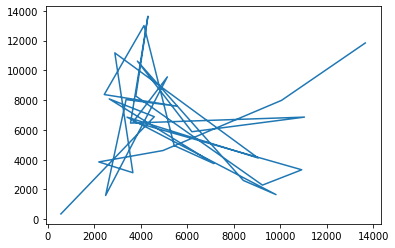

In [136]:
plt.plot(example_df["player_x"],example_df["player_y"])

In [ ]:
def arctan_me(row):
    return np.arctan
# np.arctan(x["target_x"],x["target_y"])

In [140]:
example_df.to_csv("data/clid-leesin.csv", index=False)